In [13]:
import torch
import torchvision.transforms as transforms
from torchvision import models
from PIL import Image
import os
from efficientnet_pytorch import EfficientNet
import numpy as np
from sklearn.preprocessing import normalize
import json
from sklearn.metrics.pairwise import cosine_similarity
import random

In [2]:
def preprocess_image(image_path):
    transform = transforms.Compose([
        transforms.Resize(224),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])
    image = Image.open(image_path).convert("RGB")
    return transform(image).unsqueeze(0)

def generate_embedding(image_path, model):
    input_tensor = preprocess_image(image_path)
    with torch.no_grad():
        output = model(input_tensor)
    return output.squeeze().numpy()

In [51]:
# Working folders
img_directory = '../images/'

image_files = os.listdir(img_directory)[:1000]

print(image_files)

['5739db20-e871-423b-8f4d-2cc7442928b0.jpg', '46547842-79f7-4f96-957a-3a29ad9a2f3a.jpg', '2c95a22d-1b2c-4baa-a540-8b6c61ea7e34.jpg', '5d126e21-8280-44b2-8bd0-e4a18124f150.jpg', 'da380296-8ab7-46c6-9fbc-38ef9180563f.jpg', 'cb91fe20-d5df-4a80-b173-bb07bf5c5134.jpg', '4e2f0be4-744a-4d46-af49-3fe6813744ed.jpg', 'd0cd7478-13a7-4cb1-bc43-ce043061ea5b.jpg', '3a72d1cf-02b9-4b6b-bf0d-858961c107e9.jpg', '895e5e92-ba69-4a21-b5b1-2520f33a52fc.jpg', 'fb0ce6b9-7ae2-4b95-8a95-441a53670b94.jpg', '0a56d914-4899-4bbf-9cd3-f0e34e3be6dc.jpg', '26f791c5-615f-4e45-9e40-75257b9f124f.jpg', '9816c86d-4002-4496-bc69-95317324260f.jpg', 'aff2896e-a62e-498d-8f34-4c097eab3a40.jpg', '036caafe-d045-47e6-b1d6-8e195c5e3af3.jpg', '744ee199-55fc-4ce6-a799-33a9c0b7c686.jpg', '51f434b1-fb18-464f-86a2-5cdadc0aa96a.jpg', 'c5405bd1-c613-4671-820c-4a3780a51f39.jpg', '3f523503-7c79-4cf3-879a-e0e7ec5eb106.jpg', 'd07ef995-d183-408e-a5e2-2fcaa73ffef2.jpg', 'be3d0c3e-bb5b-404e-881d-a08696f3bee6.jpg', '7a8712c5-1e9e-4f6d-86e4-e61569

In [52]:
# model setting
model = EfficientNet.from_pretrained('efficientnet-b7')
model = model.eval()

Loaded pretrained weights for efficientnet-b7


In [53]:
embeddings = []
for filename in image_files:
    embedding = generate_embedding(os.path.join(img_directory, filename), model)
    embeddings.append(embedding)

print(f'There are {len(embeddings)} embedding vectors, each size is {len(embeddings[0])}')

There are 1000 embedding vectors, each size is 1000


In [54]:
# Normalized all the embedding vectors
embeddings_array = np.array(embeddings)
normalized_embeddings = normalize(embeddings_array, axis=1)

In [174]:
idx = random.randint(0, 999)
k = 3
cosine_similarities = cosine_similarity(embeddings_array)

nearest_neighbors_indices = np.argsort(cosine_similarities[idx])[-(k+1):-1][::-1]

print(f'{k} nearest neighbors indices of item[{idx}] are items: {nearest_neighbors_indices}')
print(f'For img {image_files[idx]}, model recommends img {image_files[nearest_neighbors_indices[0]]}')


3 nearest neighbors indices of item[241] are items: [203 514 103]
For img 7d9078c8-2802-46bf-9310-c4d0c4c967d1.jpg, model recommends img c360e0b5-473e-48c3-9173-8488da650d80.jpg


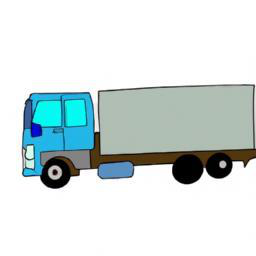

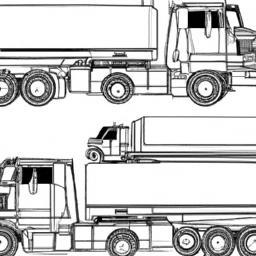

In [175]:
original_image_key = image_files[idx]
recommended_image_key = image_files[nearest_neighbors_indices[0]]
original_image = Image.open(os.path.join(img_directory, original_image_key))
recommended_image = Image.open(os.path.join(img_directory, recommended_image_key))

original_image.show()
recommended_image.show()